<a href="https://colab.research.google.com/github/takerochoi/Sounds_analize_hokudai/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
dir_path =("/content/drive/MyDrive/datascience-for-beginning /titanic/")

train_df = pd.read_csv(dir_path + "train.csv")
test_df = pd.read_csv(dir_path + "test.csv")

In [ ]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print("学習データの大きさ", train_df.shape)
print("テストデータの大きさ", test_df.shape)

学習データの大きさ (891, 12)
テストデータの大きさ (418, 11)


In [ ]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df = pd.concat([train_df, test_df], ignore_index = True)

In [ ]:
df.shape

(1309, 12)

In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
tmp = df.groupby("Sex")["PassengerId"].count()
tmp

Sex
female    466
male      843
Name: PassengerId, dtype: int64

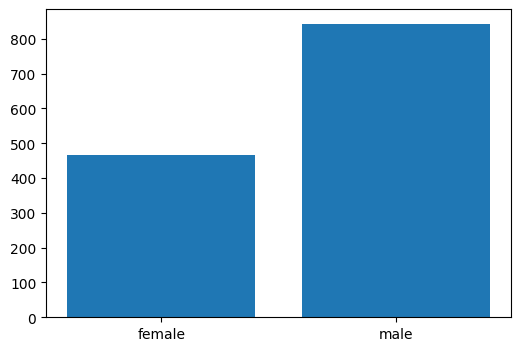

In [ ]:
 plt.figure(figsize = (6,4)) #matplotlibでの実装

 plt.bar(tmp.index, tmp.values)
 plt.show()

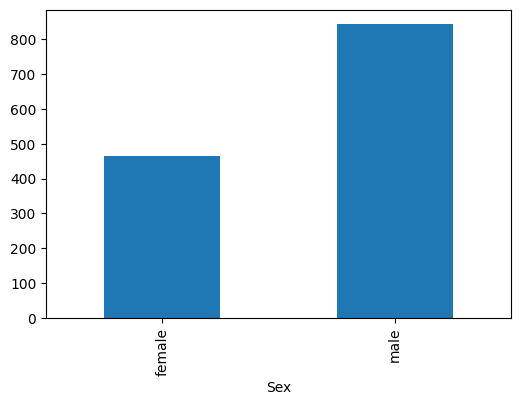

In [ ]:
tmp.plot(kind = "bar", figsize = (6, 4))#pandasでの実装
pass

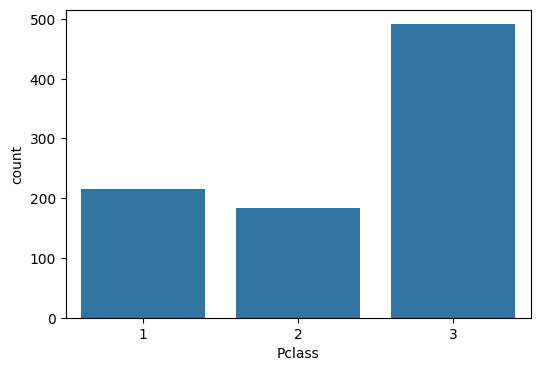

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x="Pclass")
plt.show()

In [ ]:
df2 = df.drop(columns=["Cabin", "Fare", "Ticket", "SibSp", "Parch", "Name"])

In [ ]:
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0.0,3,male,22.0,S
1,2,1.0,1,female,38.0,C
2,3,1.0,3,female,26.0,S
3,4,1.0,1,female,35.0,S
4,5,0.0,3,male,35.0,S


In [ ]:
df2.isnull().sum()#欠損値の確認

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age            263
Embarked         2
dtype: int64

In [ ]:
print("欠損値の数", df2["Embarked"].isnull().sum())

欠損値の数 2


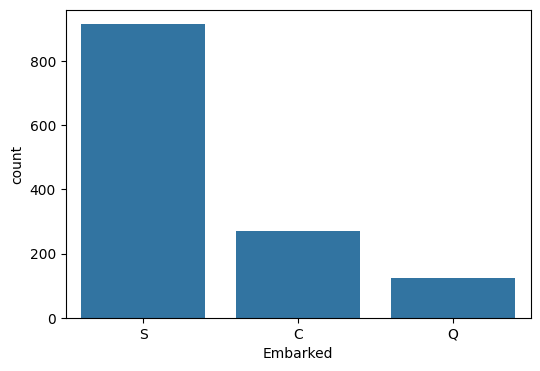

In [ ]:
plt.figure(figsize = (6,4 )) #どこの港で乗ったのかカウントするプログラム
sns.countplot(data=df2, x = "Embarked")
plt.show()

In [ ]:
df3 = df2.copy()#copy the original data
df3["Embarked"] = df3["Embarked"].fillna("S")#データの補完

In [ ]:
print("欠損値の数", df3["Embarked"].isnull().sum())

欠損値の数 0


In [ ]:
print("欠損値の数：", df3["Age"].isnull().sum())

欠損値の数： 263


In [ ]:
print("最大値", df3["Age"].min())
print("最小値", df3["Age"].max())

最大値 0.17
最小値 80.0


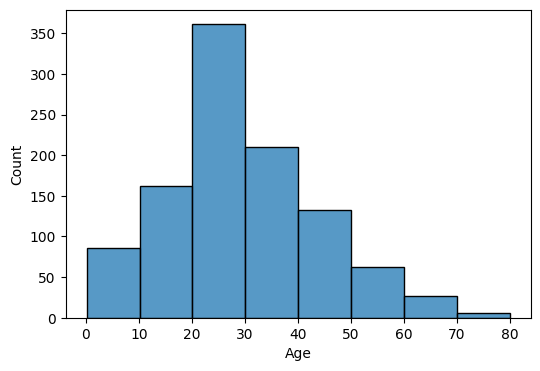

In [ ]:
plt.figure(figsize= ( 6, 4))#ヒストグラムの作成
sns.histplot(df3["Age"], kde = False, bins=8)
plt.show()

In [ ]:
print("平均値", df3["Age"].mean())
print("中央値", df3["Age"].median())

平均値 29.881137667304014
中央値 28.0


In [ ]:
df4 = df3.copy()#copy the original data
age_median = df4["Age"].median()
print(age_median)

28.0


In [ ]:
df4["Age"] = df4["Age"].fillna(age_median)#データの補完

In [ ]:
print("欠損値の数", df4["Embarked"].isnull().sum())

欠損値の数 0


In [ ]:
ohe_embarked = pd.get_dummies(df4["Embarked"], prefix="Emabarked")#ワンホットエンコーディングしてprefixは表示をわかりすくする
ohe_embarked.head()

,Emabarked_C,Emabarked_Q,Emabarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
df5 = pd.concat([df4,ohe_embarked],axis=1)
df5.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Emabarked_C,Emabarked_Q,Emabarked_S
0,1,0.0,3,male,22.0,S,0,0,1
1,2,1.0,1,female,38.0,C,1,0,0
2,3,1.0,3,female,26.0,S,0,0,1
3,4,1.0,1,female,35.0,S,0,0,1
4,5,0.0,3,male,35.0,S,0,0,1


In [ ]:
df6 = df5.drop(columns=["Embarked"])#カラムの消去

df6.head()

,PassengerId,Survived,Pclass,Sex,Age,Emabarked_C,Emabarked_Q,Emabarked_S
0,1,0.0,3,male,22.0,0,0,1
1,2,1.0,1,female,38.0,1,0,0
2,3,1.0,3,female,26.0,0,0,1
3,4,1.0,1,female,35.0,0,0,1
4,5,0.0,3,male,35.0,0,0,1


In [ ]:
df6["Sex"] = pd.get_dummies(df6["Sex"], drop_first=True)#性別カラムを数値に変換

In [ ]:
df6.head()#カテゴリー変数の数値変換が完全に完了している。データの前処理完了

,PassengerId,Survived,Pclass,Sex,Age,Emabarked_C,Emabarked_Q,Emabarked_S
0,1,0.0,3,1,22.0,0,0,1
1,2,1.0,1,0,38.0,1,0,0
2,3,1.0,3,0,26.0,0,0,1
3,4,1.0,1,0,35.0,0,0,1
4,5,0.0,3,1,35.0,0,0,1


In [ ]:
df6["Survived"].isnull()#FalseはSurvivedあり(学習データ)

0       False
1       False
2       False
3       False
4       False
        ...  
1304     True
1305     True
1306     True
1307     True
1308     True
Name: Survived, Length: 1309, dtype: bool

In [ ]:
train = df6[~df6["Survived"].isnull()]
test = df6[df6["Survived"].isnull()]

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Emabarked_C,Emabarked_Q,Emabarked_S
0,1,0.0,3,1,22.0,0,0,1
1,2,1.0,1,0,38.0,1,0,0
2,3,1.0,3,0,26.0,0,0,1
3,4,1.0,1,0,35.0,0,0,1
4,5,0.0,3,1,35.0,0,0,1


In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Sex,Age,Emabarked_C,Emabarked_Q,Emabarked_S
886,887,0.0,2,1,27.0,0,0,1
887,888,1.0,1,0,19.0,0,0,1
888,889,0.0,3,0,28.0,0,0,1
889,890,1.0,1,1,26.0,1,0,0
890,891,0.0,3,1,32.0,0,1,0


In [ ]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Emabarked_C,Emabarked_Q,Emabarked_S
891,892,NaN,3,1,34.5,0,1,0
892,893,NaN,3,0,47.0,0,0,1
893,894,NaN,2,1,62.0,0,1,0
894,895,NaN,3,1,27.0,0,0,1
895,896,NaN,3,0,22.0,0,0,1


In [ ]:
test = test.drop(columns=["Survived"])
test.head()

,PassengerId,Pclass,Sex,Age,Emabarked_C,Emabarked_Q,Emabarked_S
891,892,3,1,34.5,0,1,0
892,893,3,0,47.0,0,0,1
893,894,2,1,62.0,0,1,0
894,895,3,1,27.0,0,0,1
895,896,3,0,22.0,0,0,1


In [ ]:
y_train = train["Survived"]#知りたい物
X_train = train.drop(columns=["Survived", "PassengerId"])
print("元のdf", train.shape)
print("説明変数", X_train.shape)
print("目的変数", y_train.shape)


元のdf (891, 8)
説明変数 (891, 6)
目的変数 (891,)


In [ ]:
X_train.head()

,Pclass,Sex,Age,Emabarked_C,Emabarked_Q,Emabarked_S
0,3,1,22.0,0,0,1
1,1,0,38.0,1,0,0
2,3,0,26.0,0,0,1
3,1,0,35.0,0,0,1
4,3,1,35.0,0,0,1


In [ ]:
y_train.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import train_test_split#学習用と評価用に分割した
x_tr,x_va,y_tr,y_va = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
print("学習用", x_tr.shape, y_tr.shape)
print("評価用", x_va.shape, y_va.shape)

学習用 (712, 6) (712,)
評価用 (179, 6) (179,)


In [ ]:
y_tr.value_counts()

0.0    444
1.0    268
Name: Survived, dtype: int64

In [ ]:
y_va.value_counts()

0.0    105
1.0     74
Name: Survived, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_tr,x_va,y_tr,y_va = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42) #stratify=y_train　目的変数の割合を一致させる

In [ ]:
y_tr.value_counts()

0.0    439
1.0    273
Name: Survived, dtype: int64

In [ ]:
y_va.value_counts()

0.0    110
1.0     69
Name: Survived, dtype: int64